# Introduction to Data Analysis and Plotting in Python

This tutorial is...
* introductory and geared towards people new to Python, but familiar with STATA, MATLAB, R, etc.
* interactive with simple exercises along the way

We'll be introducing Pandas for data handling and analysis, and using Matplotlib, Seaborn and Bokeh for visualization

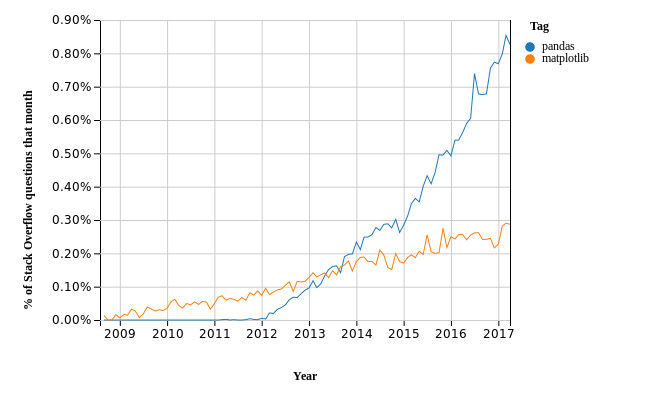

In [1]:
from IPython.display import Image
Image('./popularity.jpg')

## What is pandas?

Pandas provides fundamental structures for working with data (`Series`, `DataFrames`)

Data structures have methods for manipulating data eg. indexing, sorting, grouping, filling in missing data

Pandas does not provide modeling tools eg. regression, prediction
* These tools are found in packages such as `scikit-learn` and `statsmodels`, which are built on top of pandas

## DataFrames

A `DataFrame` combines multiple 'columns' of data into a two-dimensional object, similar to a spreadsheet

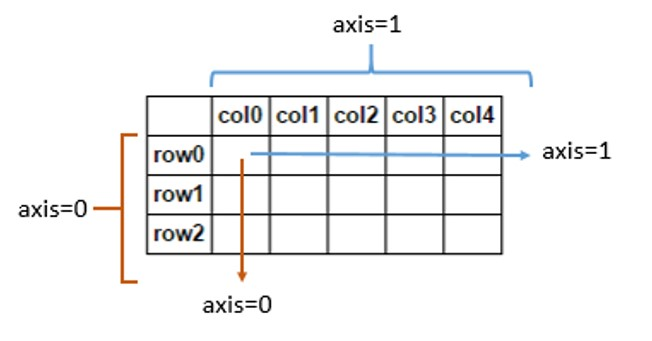

In [2]:
Image('./dataframe.jpg')

We will create a `DataFrame` by reading in a Stata file and assigning it to the variable name `df`

### Info on the data set

* The data come from ['Assessing the Rate of Replication in Economics'](https://www.aeaweb.org/articles?id=10.1257/aer.p20171119), *American Economics Review: Papers & Proceedings*, 2017
* The dataframe `volume` contains 70 empirical papers from AER's 100th volume
* `volWoS`: number of Web of Science citations
* `volTop200Econ`: number of Top 200 economics journal citations
* `volGScites`: number of Google Scholar citations

In [3]:
import pandas as pd  # Import the package

volume = pd.read_stata('./data/VolumePaperData.dta')
volume.head()

,volID,volTitle,volCoder,volWoS,volTop200Econ,volGScites,volField
0,2,Learning about a New Technology: Pineapple in ...,3.0,176,108.0,1246,Development
1,3,Multiple-Product Firms and Product Switching,5.0,111,74.0,764,Labor/IO
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",5.0,23,15.0,98,Labor/IO
3,5,Matching and Sorting in Online Dating,1.0,75,23.0,326,Labor/IO
4,6,"Entry, Exit, and Investment-Specific Technical...",2.0,9,9.0,38,Macro/Int/Trade


In [4]:
volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
volID            70 non-null int16
volTitle         70 non-null object
volCoder         70 non-null float32
volWoS           70 non-null int32
volTop200Econ    70 non-null float64
volGScites       70 non-null int16
volField         70 non-null category
dtypes: category(1), float32(1), float64(1), int16(2), int32(1), object(1)
memory usage: 2.7+ KB


We can access individual columns of data, returning a `Series`

In [5]:
volume['volWoS'].head()

0    176
1    111
2     23
3     75
4      9
Name: volWoS, dtype: int32

We can also select multiple columns, returning a new dataframe

In [6]:
volume[['volTitle', 'volWoS']].head()

,volTitle,volWoS
0,Learning about a New Technology: Pineapple in ...,176
1,Multiple-Product Firms and Product Switching,111
2,"Momma's Got the Pill"": How Anthony Comstock an...",23
3,Matching and Sorting in Online Dating,75
4,"Entry, Exit, and Investment-Specific Technical...",9


We can add a new column to our dataframe like so

In [7]:
volume['totalCites'] = volume['volWoS'] + volume['volTop200Econ'] + volume['volGScites']
volume.head()

,volID,volTitle,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
0,2,Learning about a New Technology: Pineapple in ...,3.0,176,108.0,1246,Development,1530.0
1,3,Multiple-Product Firms and Product Switching,5.0,111,74.0,764,Labor/IO,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",5.0,23,15.0,98,Labor/IO,136.0
3,5,Matching and Sorting in Online Dating,1.0,75,23.0,326,Labor/IO,424.0
4,6,"Entry, Exit, and Investment-Specific Technical...",2.0,9,9.0,38,Macro/Int/Trade,56.0


If we want to know the average number of Web of Science citations...

In [8]:
volume['volWoS'].mean()

42.07142857142857

`.describe()` returns useful summary statistics 

In [9]:
volume['volWoS'].describe()

count     70.000000
mean      42.071429
std       43.070660
min        1.000000
25%       17.250000
50%       28.500000
75%       51.000000
max      195.000000
Name: volWoS, dtype: float64

### Exercises

#### Find the means of Top 200 and Google Scholar citations

<button data-toggle="collapse" data-target="#sol2" class='btn btn-primary'>Solution</button>
<div id="sol2" class="collapse">
```python
volume[['volTop200Econ', 'volGScites']].mean()
```
```
volTop200Econ     22.257143
volGScites       227.571429
dtype: float64
```

#### Find the median of Web of Science citations

<button data-toggle="collapse" data-target="#sol3" class='btn btn-primary'>Solution</button>
<div id="sol3" class="collapse">
```python
volume['volWoS'].median()
```
```
28.5
```

#### Create a table of summary statistics of Top 200 cites and Google Scholar cites

<button data-toggle="collapse" data-target="#sol4" class='btn btn-primary'>Solution</button>
<div id="sol4" class="collapse">
```python
volume[['volTop200Econ', 'volGScites']].describe()
```
<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>volTop200Econ</th>       <th>volGScites</th>    </tr>   </thead>   <tbody>     <tr>       <th>count</th>       <td>70.000000</td>       <td>70.000000</td>     </tr>     <tr>      <th>mean</th>       <td>22.257143</td>       <td>227.571429</td>     </tr>     <tr>       <th>std</th>       <td>23.182131</td>       <td>257.258375</td>     </tr>     <tr>       <th>min</th>       <td>0.000000</td>       <td>7.000000</td>     </tr>     <tr>       <th>25%</th>       <td>9.000000</td>       <td>73.250000</td>     </tr>     <tr>       <th>50%</th>       <td>15.000000</td>       <td>139.000000</td>     </tr>     <tr>       <th>75%</th>       <td>23.750000</td>     <td>267.250000</td>     </tr>     <tr>       <th>max</th>       <td>108.000000</td>      <td>1246.000000</td>    </tr>  </tbody> </table>

#### Create a table of summary statistics of the paper's fields (according to the variable `volField`)

<button data-toggle="collapse" data-target="#sol5" class='btn btn-primary'>Solution</button>
<div id="sol5" class="collapse">
```python
volume['volField'].describe()
```
```
count                  70
unique                  5
top       Macro/Int/Trade
freq                   25
Name: volField, dtype: object
```

## Selecting and filtering

We can use integer slicing to select rows as follows

In [10]:
volume[:5]

,volID,volTitle,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
0,2,Learning about a New Technology: Pineapple in ...,3.0,176,108.0,1246,Development,1530.0
1,3,Multiple-Product Firms and Product Switching,5.0,111,74.0,764,Labor/IO,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",5.0,23,15.0,98,Labor/IO,136.0
3,5,Matching and Sorting in Online Dating,1.0,75,23.0,326,Labor/IO,424.0
4,6,"Entry, Exit, and Investment-Specific Technical...",2.0,9,9.0,38,Macro/Int/Trade,56.0


We might want to find the top cited papers

First we will sort our values by a column in the dataframe

In [11]:
pd.set_option('max_colwidth', 100)  # adjust column width

volume[['volTitle', 'volTop200Econ']].sort_values(by='volTop200Econ', ascending=False)[:5]

,volTitle,volTop200Econ
0,Learning about a New Technology: Pineapple in Ghana,108.0
33,What Causes Industry Agglomeration? Evidence from Coagglomeration Patterns,93.0
15,"Social Preferences, Beliefs, and the Dynamics of Free Riding in Public Goods Experiments",86.0
1,Multiple-Product Firms and Product Switching,74.0
35,Are Risk Aversion and Impatience Related to Cognitive Ability?,73.0


Another way to select rows is to use row labels, ie. set a row index

Similar to the column labels, we can add row labels (the index)

In [12]:
volume.set_index('volTitle').head()

,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
volTitle,,,,,,,
Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,Development,1530.0
Multiple-Product Firms and Product Switching,3,5.0,111,74.0,764,Labor/IO,949.0
"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",4,5.0,23,15.0,98,Labor/IO,136.0
Matching and Sorting in Online Dating,5,1.0,75,23.0,326,Labor/IO,424.0
"Entry, Exit, and Investment-Specific Technical Change",6,2.0,9,9.0,38,Macro/Int/Trade,56.0


Note: we haven't actually changed `volume`

In [13]:
volume.head()

,volID,volTitle,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
0,2,Learning about a New Technology: Pineapple in Ghana,3.0,176,108.0,1246,Development,1530.0
1,3,Multiple-Product Firms and Product Switching,5.0,111,74.0,764,Labor/IO,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",5.0,23,15.0,98,Labor/IO,136.0
3,5,Matching and Sorting in Online Dating,1.0,75,23.0,326,Labor/IO,424.0
4,6,"Entry, Exit, and Investment-Specific Technical Change",2.0,9,9.0,38,Macro/Int/Trade,56.0


Need to overwrite `volume` with the new copy

In [14]:
volume = volume.set_index('volTitle')   # Can also use volume.set_index('volTitle', inplace=True)
volume.head()

,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
volTitle,,,,,,,
Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,Development,1530.0
Multiple-Product Firms and Product Switching,3,5.0,111,74.0,764,Labor/IO,949.0
"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",4,5.0,23,15.0,98,Labor/IO,136.0
Matching and Sorting in Online Dating,5,1.0,75,23.0,326,Labor/IO,424.0
"Entry, Exit, and Investment-Specific Technical Change",6,2.0,9,9.0,38,Macro/Int/Trade,56.0


In [15]:
volume.loc['Matching and Sorting in Online Dating']

volID                   5
volCoder                1
volWoS                 75
volTop200Econ          23
volGScites            326
volField         Labor/IO
totalCites            424
Name: Matching and Sorting in Online Dating, dtype: object

In [16]:
volume.loc[['Matching and Sorting in Online Dating', 'Learning about a New Technology: Pineapple in Ghana']]

,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
volTitle,,,,,,,
Matching and Sorting in Online Dating,5,1.0,75,23.0,326,Labor/IO,424.0
Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,Development,1530.0


We can also sort our index (this is recommended for efficient selecting and filtering)

In [17]:
volume.sort_index(inplace=True)
volume.head()

,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
volTitle,,,,,,,
A New Approach to Estimating the Production Function for Housing,37,5.0,13,11.0,74,Applied (gen.),98.0
A Study of the Internal Organization of a Bidding Cartel,32,5.0,21,11.0,127,Labor/IO,159.0
A Theory of Optimal Random Crackdowns,44,5.0,4,2.0,41,Applied (gen.),47.0
An Exploration of Technology Diffusion,84,2.0,36,16.0,226,Macro/Int/Trade,278.0
Are Health Insurance Markets Competitive?,58,5.0,29,16.0,139,Labor/IO,184.0


Alternatively, we can filter our dataframe (select rows) using *boolean conditions*

In [18]:
volume.reset_index(inplace=True)

volume['volField'] == 'Development'

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29    False
      ...  
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68     True
69    False
Name: volField, Length: 70, dtype: bool

Selecting rows with this boolean condition will return only rows of the dataframe where `volField == 'Development'` is `True`

In [19]:
volume[volume['volField'] == 'Development']

,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
6,Can Higher Prices Stimulate Product Use? Evidence from a Field Experiment in Zambia,97,1.0,44,21.0,265,Development,330.0
13,"Determinants of Redistributive Politics: An Empirical Analysis of Land Reforms in West Bengal, I...",64,3.0,12,9.0,63,Development,84.0
25,Inherited Trust and Growth,85,3.0,102,44.0,536,Development,682.0
34,Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,Development,1530.0
39,Multinationals and Anti-Sweatshop Activism,9,4.0,21,8.0,134,Development,163.0
68,Watta Satta: Bride Exchange and Women's Welfare in Rural Pakistan,73,3.0,6,4.0,37,Development,47.0


In [20]:
volume[(volume['volField'] == 'Development') & (volume['volWoS'] > 100)]

,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
25,Inherited Trust and Growth,85,3.0,102,44.0,536,Development,682.0
34,Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,Development,1530.0


### Exercises

#### How many papers in the sample have over 100 Google Scholar citations?
* Hint: use `len()` to find the length of a dataframe

<button data-toggle="collapse" data-target="#sol6" class='btn btn-primary'>Solution</button>
<div id="sol6" class="collapse">
```python
len(volume[volume['volGScites'] > 100])
```
```
44
```

#### How many 'Labor/IO' papers have over 100 Google Scholar citations?

<button data-toggle="collapse" data-target="#sol7" class='btn btn-primary'>Solution</button>
<div id="sol7" class="collapse">
```python
len(volume[(volume['volGScites'] > 100) & (volume['volField'] == 'Labor/IO')])
```
```
10
```

#### Of all development papers, which has the highest number of Google Scholar citations?

<button data-toggle="collapse" data-target="#sol8" class='btn btn-primary'>Solution</button>
<div id="sol8" class="collapse">
```python
volume[volume['volField'] == 'Development'].sort_values(by='volGScites', ascending=False)[:1]
```
<table border="1" class="dataframe">   <thead>     <tr style="text-align: right;">       <th></th>       <th>index</th>       <th>volField</th>       <th>volTitle</th>       <th>volID</th>       <th>volCoder</th>       <th>volWoS</th>       <th>volTop200Econ</th>       <th>volGScites</th>       <th>totalCites</th>     </tr>   </thead>   <tbody>     <tr>       <th>10</th>       <td>10</td>       <td>Development</td>       <td>Learning about a New Technology: Pineapple in Ghana</td>       <td>2</td>       <td>3.0</td>       <td>176</td>       <td>108.0</td>       <td>1246</td>       <td>1530.0</td>     </tr>   </tbody> </table>

## Grouping and aggregating data

We might want to summarize our data by grouping it by fields

To do this, we will use the `.groupby()` function

In [21]:
volume.reset_index(inplace=True)

grouped = volume.groupby('volField')
grouped

In [22]:
grouped.groups

{'Applied (gen.)': Int64Index([0, 2, 15, 19, 33, 42, 64], dtype='int64'),
 'Behavioral/Exp.': Int64Index([5, 8, 14, 18, 26, 27, 32, 41, 43, 44, 45, 47, 49, 50, 51, 52, 53,
             54, 65],
            dtype='int64'),
 'Development': Int64Index([6, 13, 25, 34, 39, 68], dtype='int64'),
 'Labor/IO': Int64Index([1, 4, 10, 16, 17, 31, 36, 37, 40, 61, 62, 67, 69], dtype='int64'),
 'Macro/Int/Trade': Int64Index([ 3,  7,  9, 11, 12, 20, 21, 22, 23, 24, 28, 29, 30, 35, 38, 46, 48,
             55, 56, 57, 58, 59, 60, 63, 66],
            dtype='int64')}

To return an *aggregated* dataframe, we need to specify the function we would like pandas to use to aggregate our groups

In [23]:
grouped.mean()

,index,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites
volField,,,,,,,
Applied (gen.),25.000000,49.285714,3.857143,33.428571,13.142857,199.714286,246.285714
Development,30.833333,55.000000,2.833333,60.166667,32.333333,380.166667,472.666667
Labor/IO,34.692308,35.923077,4.230769,46.384615,26.461538,254.384615,327.230769
Behavioral/Exp.,38.105263,65.000000,1.947368,48.842105,24.000000,202.789474,275.631579
Macro/Int/Trade,35.200000,51.880000,2.760000,32.760000,18.880000,203.640000,255.280000


In [24]:
grouped['volWoS'].mean()

volField
Applied (gen.)     33.428571
Development        60.166667
Labor/IO           46.384615
Behavioral/Exp.    48.842105
Macro/Int/Trade    32.760000
Name: volWoS, dtype: float64

In [25]:
grouped['volWoS'].agg(['mean', 'median', 'sum'])

,mean,median,sum
volField,,,
Applied (gen.),33.428571,29.0,234
Development,60.166667,32.5,361
Labor/IO,46.384615,30.0,603
Behavioral/Exp.,48.842105,29.0,928
Macro/Int/Trade,32.760000,22.0,819


A list of built-in aggregatation functions can be found [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

Pandas provides a built-in plotting command to create `matplotlib` plots from your dataframes

To display our plots, we need to import first `matplotlib`

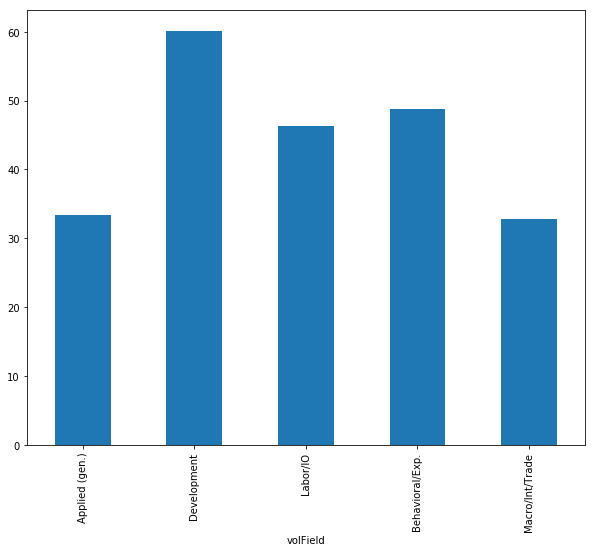

In [26]:
import matplotlib.pyplot as plt

grouped['volWoS'].mean().plot(kind='bar', figsize=(10, 8))
plt.show()

### Exercise

#### Return the mean of Google Scholar citations for each field and sort from highest to lowest, plot the result as a bar plot

<button data-toggle="collapse" data-target="#sol9" class='btn btn-primary'>Solution</button>
<div id="sol9" class="collapse">
```python
grouped['volGScites'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()
```
<img src = './plot_groupby.png'>

## Merging datasets

So far, we have not talked about *replication* of papers

This data is located in a different Stata file, which we will load in and assign to the variable `cites`

`cites` contains data on each citation of a paper in the `volume` dataframe

We are interested in the indicator variables, **replication** and **extension**

In [27]:
cites = pd.read_stata('./data/AssessingCodedData.dta')
cites.head()

,volID,paperID,volCoder,replication,extension,cField,sameSpec,samePop,sameSample,timesCited,commonAuthor,year,widerScope,frameRep
0,2,25,3.0,0.0,0.0,Labor/IO,0.0,0.0,0.0,2.0,0.0,2012.0,NaN,0.0
1,2,65,3.0,0.0,0.0,Applied (gen.),0.0,0.0,0.0,1.0,0.0,2015.0,NaN,0.0
2,2,69,3.0,0.0,0.0,Development,0.0,0.0,0.0,1.0,0.0,2013.0,NaN,0.0
3,2,127,3.0,0.0,0.0,Theory,0.0,0.0,0.0,2.0,0.0,2011.0,NaN,0.0
4,2,135,3.0,0.0,0.0,Applied (gen.),0.0,0.0,0.0,1.0,0.0,2012.0,NaN,0.0


We want to add this data to our original dataframe

To do this, we will group `cites` by `volID`, which is a unique identifier for the original 70 empirical papers

We will aggregate using `.sum()` to find the total number of replications and extensions for each of the 70 papers

In [28]:
volumes_cites = cites[['volID', 'replication', 'extension']].groupby('volID').sum()
volumes_cites.head()

,replication,extension
volID,,
2,1.0,10.0
3,1.0,2.0
4,2.0,0.0
5,0.0,5.0
6,0.0,0.0


We will also add a new column that sums total replications and extensions

In [29]:
volumes_cites['either'] = volumes_cites['replication'] + volumes_cites['extension']
volumes_cites.head()

,replication,extension,either
volID,,,
2,1.0,10.0,11.0
3,1.0,2.0,3.0
4,2.0,0.0,2.0
5,0.0,5.0,5.0
6,0.0,0.0,0.0


To combine this data with our original dataframe, `volume`, we will use `pd.merge()`

In [30]:
merged = pd.merge(volume, volumes_cites, how='left', left_on='volID', right_index=True)
merged.head()

,index,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites,replication,extension,either
0,0,A New Approach to Estimating the Production Function for Housing,37,5.0,13,11.0,74,Applied (gen.),98.0,0.0,1.0,1.0
1,1,A Study of the Internal Organization of a Bidding Cartel,32,5.0,21,11.0,127,Labor/IO,159.0,0.0,0.0,0.0
2,2,A Theory of Optimal Random Crackdowns,44,5.0,4,2.0,41,Applied (gen.),47.0,0.0,0.0,0.0
3,3,An Exploration of Technology Diffusion,84,2.0,36,16.0,226,Macro/Int/Trade,278.0,0.0,0.0,0.0
4,4,Are Health Insurance Markets Competitive?,58,5.0,29,16.0,139,Labor/IO,184.0,0.0,0.0,0.0


We have specified a 'left' merged, meaning we keep all rows from the left dataset (`volume`) and merge rows from the right dataset (`volume_cites`) where possible

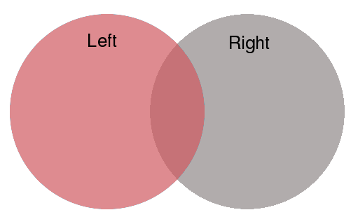

In [31]:
Image('./venn_diag.png')

Note that we have some `NaN` values in our rows - these are papers in the sample which presumably had zero citations (where there was no data found in the 'right' dataframe)

In [32]:
merged[merged['either'].isnull()]

,index,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites,replication,extension,either
45,45,Preemption Games: Theory and Experiment,72,1.0,1,0.0,18,Behavioral/Exp.,19.0,NaN,NaN,NaN
57,57,Technology Adoption with Exit in Imperfectly Informed Equity Markets,38,2.0,1,0.0,7,Macro/Int/Trade,8.0,NaN,NaN,NaN


We will fill these is as 0

In [33]:
merged[['replication', 'extension', 'either']] = merged[['replication', 'extension', 'either']].fillna(0)
merged[merged['volTitle'] == 'Preemption Games: Theory and Experiment']

,index,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites,replication,extension,either
45,45,Preemption Games: Theory and Experiment,72,1.0,1,0.0,18,Behavioral/Exp.,19.0,0.0,0.0,0.0


We can now use this dataframe to plot the average number of replications and extensions by field

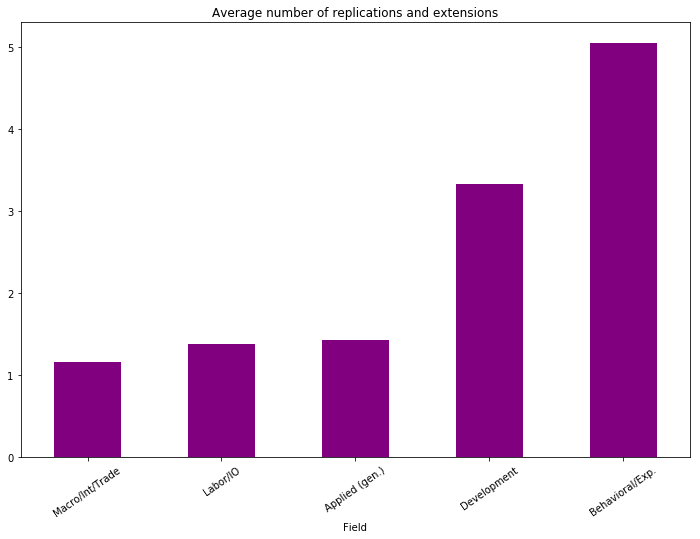

In [34]:
to_plot = merged[['volField', 'either']].groupby('volField').mean()
to_plot.sort_values(by='either').plot(kind='bar', color='purple', figsize=(12, 8), legend=False)
plt.title('Average number of replications and extensions')
plt.xlabel('Field')
plt.xticks(rotation=35)
plt.show()

### Exercises

#### Try to recreate this plot. 
* **Hint:** The plot kind is `'scatter'`

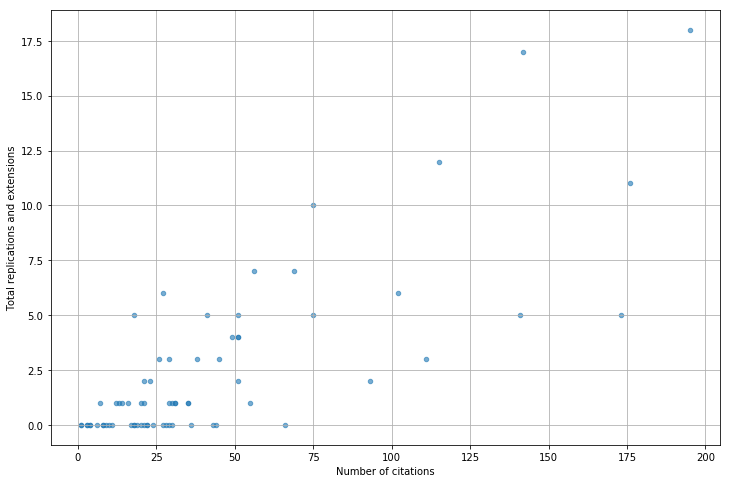

In [35]:
Image('./plot_exer1.png')

<button data-toggle="collapse" data-target="#sol10" class='btn btn-primary'>Solution</button>
<div id="sol10" class="collapse">
```python
merged.plot(x='volWoS', y='either', kind='scatter', alpha=0.6, figsize=(12, 8))
plt.ylabel('Total replications and extensions')
plt.xlabel('Number of citations')
plt.grid()
plt.show()
```

## Another plotting library: `seaborn`

* `seaborn` is a plotting library built on top of `matplotlib`

* It is geared towards producing pretty plots for statistical applications

* You can find an example gallery of `seaborn` plots [here](https://seaborn.pydata.org/examples/index.html)

In [36]:
import seaborn as sns  # Import the package

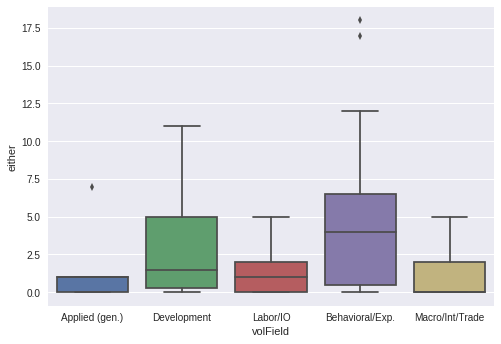

In [37]:
sns.boxplot(x='volField', y='either', data=merged)
plt.show()

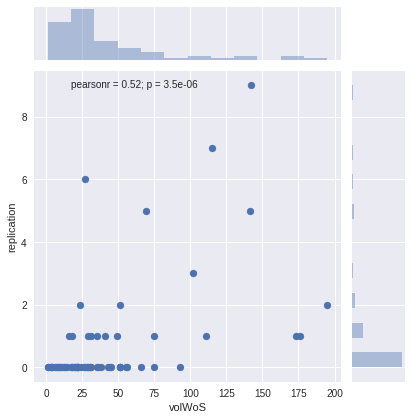

In [38]:
sns.jointplot(x='volWoS', y='replication', data=merged)
plt.show()

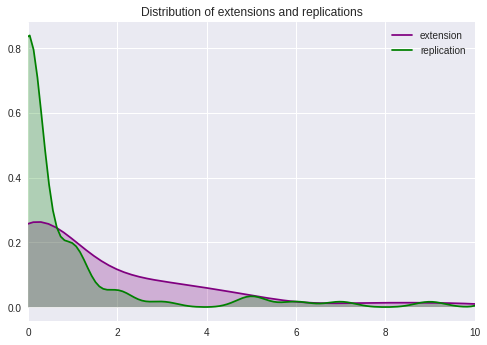

In [39]:
sns.kdeplot(data=merged['extension'], shade=True, color='purple', legend=False)
sns.kdeplot(data=merged['replication'], shade=True, color='green', legend=False)
plt.xlim(0, 10)
plt.title('Distribution of extensions and replications')
plt.legend()
plt.show()

### Exercise

The following figure is from the original paper, plotting the cumulative density function of citations for papers that were either replicated or not replicated

Can you recreate the figure using the `kdeplot` function from `seaborn`? Hint: have a look at the documentation of `kdeplot` by running `sns.kdeplot?`

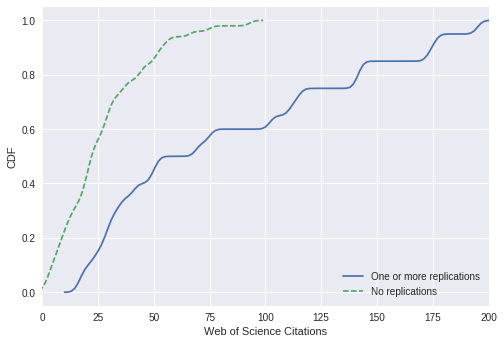

In [40]:
Image('./plot_exer3.png')

<button data-toggle="collapse" data-target="#sol12" class='btn btn-primary'>Solution</button>
<div id="sol12" class="collapse">
```python
sns.kdeplot(data=merged[merged['replication'] > 0].loc[:, 'volWoS'], cumulative=True, bw=2)
sns.kdeplot(data=merged[merged['replication'] == 0].loc[:, 'volWoS'], cumulative=True, linestyle='--', bw=2)
plt.xlim(0, 200)
plt.xlabel('Web of Science Citations')
plt.ylabel('CDF')
plt.legend(['One or more replications', 'No replications'])
plt.show()
```

## Bokeh example

Bokeh is a Python library that makes creating interactive plots super easy - an example gallery is [here](http://bokeh.pydata.org/en/latest/docs/gallery.html)

In [55]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

# Add data source
source = ColumnDataSource(merged[['volTitle', 'volWoS', 'replication', 'extension']])
colors = ['red', 'blue']

# Add title tooltips
hover = HoverTool(tooltips=[
    ("Title", "@volTitle"),
    ("(x,y)", "($x, $y)")
])

# Create figure
p = figure(tools=[hover])

# Plot scatter
for to_plot, color in zip(['replication', 'extension'], colors):
    p.circle(x='volWoS', y=to_plot, source=source, size=7, alpha=0.7, legend=[to_plot.title() + 's'], color=color)

p.legend.click_policy = 'hide'
p.xaxis.axis_label = 'Number of citations'
p.yaxis.axis_label = 'Number of replications or extensions'

show(p)

Loading BokehJS ...

## Other resources

Here are some free, online resources for learning pandas/matplotlib:

* QuantEcon lectures: [Pandas](https://lectures.quantecon.org/py/pandas.html), [Pandas for Panel Data](https://lectures.quantecon.org/py/pandas_panel.html), [Matplotlib](https://lectures.quantecon.org/py/matplotlib.html)
* QuantEcon [Stata-R-Pandas cheatsheet](https://cheatsheets.quantecon.org/stats-cheatsheet.html)
* SciPy 2017: [Anatomy of Matplotlib](https://www.youtube.com/watch?v=rARMKS8jE9g)
* Coursera/University of Michigan: [Introduction to Data Science in Python](https://www.coursera.org/learn/python-data-analysis)

# Optional: object-orientated plotting

* `matplotlib`'s OOP interface allows greater flexibility for plotting - recommended for creating more complicated plots
* We will be working with two objects - `Figure` and `Axes`

In [42]:
plt.style.use('default') # reset style - seaborn changed the style when we plotted seaborn figures before

fig, ax = plt.subplots()

In [43]:
type(fig)

matplotlib.figure.Figure

In [44]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

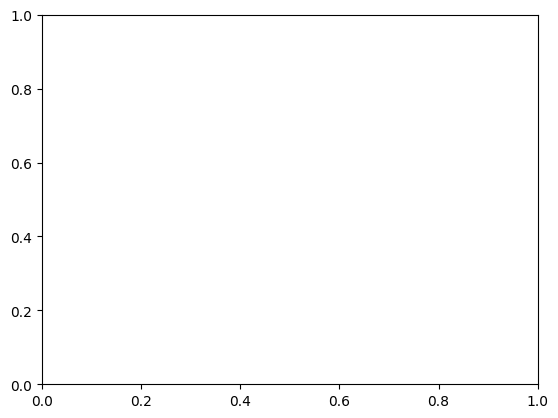

In [45]:
fig
plt.show()

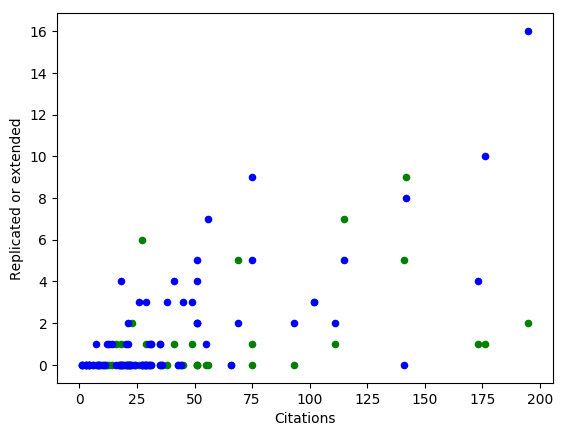

In [46]:
fig, ax = plt.subplots()
merged.plot(x='volWoS', y='replication', kind='scatter', c='green', ax=ax)
merged.plot(x='volWoS', y='extension', kind='scatter', c='blue', ax=ax)
plt.xlabel('Citations')
plt.ylabel('Replicated or extended')
plt.show()

We can use the OOP interface to create multiple plots in one figure

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

In [48]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7e340def0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d99c9470>], dtype=object)

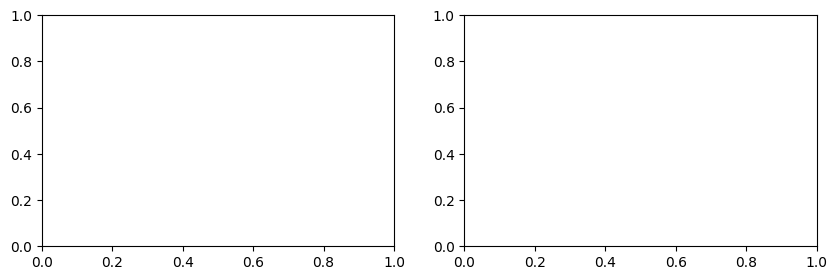

In [49]:
fig

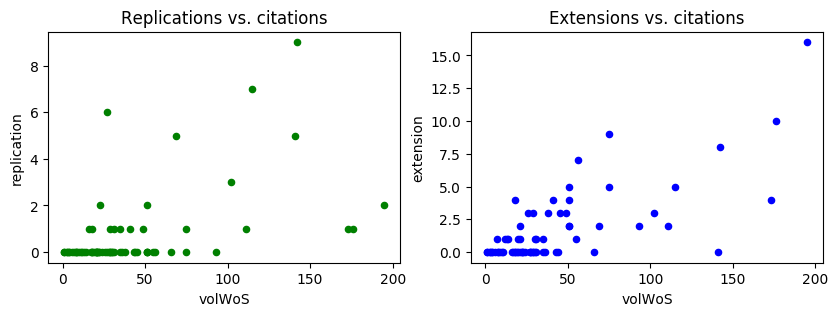

In [50]:
merged.plot(x='volWoS', y='replication', kind='scatter', c='green', ax=axes[0])
merged.plot(x='volWoS', y='extension', kind='scatter', c='blue', ax=axes[1])
axes[0].set_title('Replications vs. citations')
axes[1].set_title('Extensions vs. citations')
fig
plt.show()

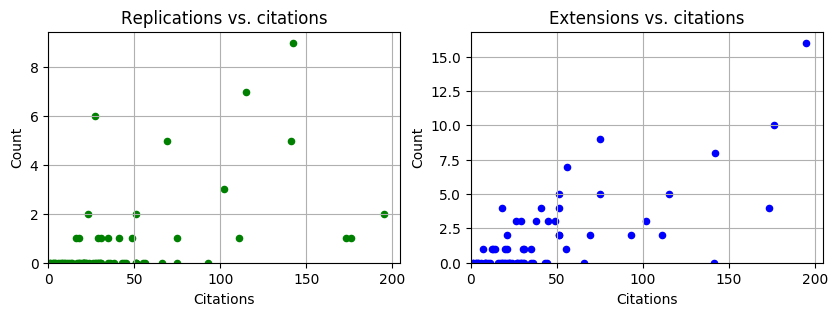

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

merged.plot(x='volWoS', y='replication', kind='scatter', c='green', ax=axes[0])
merged.plot(x='volWoS', y='extension', kind='scatter', c='blue', ax=axes[1])
axes[0].set_title('Replications vs. citations')
axes[1].set_title('Extensions vs. citations')

for ax in axes:
    ax.set(xlim=0, ylim=0, xlabel='Citations', ylabel='Count')
    ax.grid()
    
fig
plt.show()

### Exercise

#### Try to recreate the figure below that contains three plots for each different citation measure, with replications & extensions vs. citations

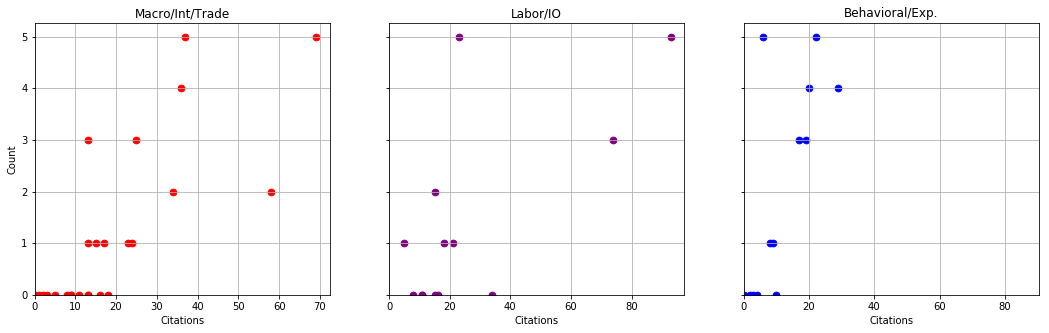

In [52]:
Image('./plot_exer2.png')

<button data-toggle="collapse" data-target="#sol11" class='btn btn-primary'>Solution</button>
<div id="sol11" class="collapse">
```python
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

to_plot = ['Macro/Int/Trade', 'Labor/IO', 'Behavioral/Exp.']
colors = ['red', 'purple', 'blue']

for ax, plot, color in zip(axes, to_plot, colors):
    merged[merged['volField'] == plot].plot.scatter(x='volTop200Econ', y='either', s=45, ax=ax, color=color)
    ax.set(xlim=0, ylim=0, xlabel='Citations', ylabel='Count', title=plot)
    ax.grid()

fig
plt.show()
```

#### Create a similar figure, instead using `seaborn` to plot kernel density estimates of citations in three fields

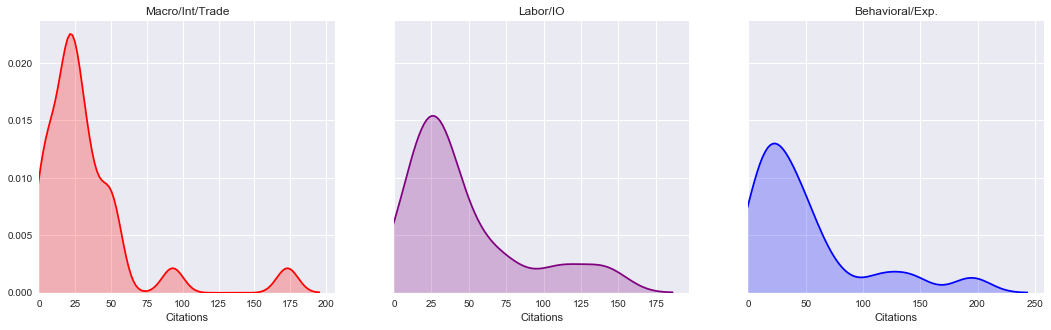

In [53]:
Image('./plot_exer4.png')

<button data-toggle="collapse" data-target="#sol13" class='btn btn-primary'>Solution</button>
<div id="sol13" class="collapse">
```python
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

to_plot = ['Macro/Int/Trade', 'Labor/IO', 'Behavioral/Exp.']
colors = ['red', 'purple', 'blue']

for ax, plot, color in zip(axes, to_plot, colors):
    sns.kdeplot(merged[merged['volField'] == plot].loc[:, 'volWoS'], ax=ax, color=color, shade=True, legend=False)
    ax.set(xlim=0, ylim=0, xlabel='Citations', title=plot)

fig
plt.show()
```